In [ ]:
import shapely
from shapely import Polygon

from osgeo import gdal
import rasterio

import atlite
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
from scipy.constants import physical_constants


In [80]:
dataset = "reanalysis-era5-single-levels"
request = {
    "product_type": ["reanalysis"],
    "variable": [
        "10m_u_component_of_wind",
        "10m_v_component_of_wind",
        "100m_u_component_of_wind",
        "100m_v_component_of_wind",
        "10m_u_component_of_neutral_wind",
        "10m_v_component_of_neutral_wind",
        "10m_wind_gust_since_previous_post_processing",
        "instantaneous_10m_wind_gust",
        "clear_sky_direct_solar_radiation_at_surface",
        "downward_uv_radiation_at_the_surface",
        "forecast_logarithm_of_surface_roughness_for_heat",
        "instantaneous_surface_sensible_heat_flux",
        "near_ir_albedo_for_diffuse_radiation",
        "near_ir_albedo_for_direct_radiation",
        "surface_latent_heat_flux",
        "surface_net_solar_radiation",
        "surface_net_solar_radiation_clear_sky",
        "surface_net_thermal_radiation",
        "surface_net_thermal_radiation_clear_sky",
        "surface_sensible_heat_flux",
        "surface_solar_radiation_downward_clear_sky",
        "surface_solar_radiation_downwards",
        "surface_thermal_radiation_downward_clear_sky",
        "surface_thermal_radiation_downwards",
        "toa_incident_solar_radiation",
        "top_net_solar_radiation",
        "top_net_solar_radiation_clear_sky",
        "top_net_thermal_radiation",
        "top_net_thermal_radiation_clear_sky",
        "total_sky_direct_solar_radiation_at_surface",
        "uv_visible_albedo_for_diffuse_radiation",
        "uv_visible_albedo_for_direct_radiation",
        "evaporation",
        "potential_evaporation",
        "runoff",
        "sub_surface_runoff",
        "surface_runoff"
    ],
    "year": ["2023"],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "time": [
        "00:00", "01:00", "02:00",
        "03:00", "04:00", "05:00",
        "06:00", "07:00", "08:00",
        "09:00", "10:00", "11:00",
        "12:00", "13:00", "14:00",
        "15:00", "16:00", "17:00",
        "18:00", "19:00", "20:00",
        "21:00", "22:00", "23:00"
    ],
    "data_format": "netcdf",
    "download_format": "unarchived",
    "area": [70, -10, -35, 35]
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()


2024-12-03 12:32:53,610 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


Exception: Not Found

In [30]:
weather_excel_path = "Parameters/weather_parameters.xlsx"

weather_parameters = pd.read_excel(weather_excel_path,
                                       index_col = 'Parameters'
                                       ).squeeze('columns')
weather_filename = weather_parameters['Filename']

hexagons = gpd.read_file('Resources/hex_transport.geojson')

cutout = atlite.Cutout('Cutouts_23/' + weather_filename +'.nc')
# cutout = atlite.Cutout('Cutouts_EU/EU23.nc')
layout = cutout.uniform_layout()

In [31]:
location_hydro = gpd.read_file('Data/hydropower_dams.gpkg')
# location_hydro = gpd.read_file('Data/hydropower_dams_EU.gpkg')
# location_hydro = location_hydro[location_hydro["country_code"] != "NO"]
location_hydro.rename(columns={'Latitude': 'lat', 'Longitude': 'lon'}, inplace=True)
location_hydro.rename(columns={'head_example':'head'},inplace=True)
location_hydro.iloc[:3]

,SNo,Status,Fuel Type,lat,lon,Total capacity (MW),capacity,Expected Generation (GWh),total theoretical possible generation (local) GWh,COD,head,geometry
0,1,Existing,Reservoir,18.530336,102.547646,155.0,112.70,1025.0,1357.800,1971.0,45.5,POINT (102.54765 18.53034)
1,2,Existing,Run - Off,15.491752,106.278715,45.0,32.72,180.0,394.200,1991.0,10.0,POINT (106.27872 15.49175)
2,3,Existing,Reservoir,18.261088,104.562496,440.0,0.04,2691.0,0.438,2013.0,27.0,POINT (104.56250 18.26109)


In [26]:
hexagons['hydro'] = hexagons['hydro'].fillna(0)
hexagons['hydro'].unique()
# hex_final['capacity'] = hex_final['capacity'].fillna(0)

array([0.0000e+00, 4.3400e+00, 6.0730e+01, 8.6750e+01, 1.0410e+02,
       9.1100e+00, 2.6000e+00, 1.6660e+01, 5.9860e+01, 1.5182e+02,
       3.5569e+02, 1.3010e+01, 1.1278e+02, 1.5616e+02, 1.0800e+00,
       1.2150e+01, 1.4575e+02, 1.2580e+01, 5.7260e+01, 5.2050e+01,
       1.9950e+01, 2.7070e+01, 2.2556e+02, 1.0410e+01, 1.8218e+02,
       1.2666e+03, 4.7700e+00, 5.5520e+01, 6.9400e+00, 3.9040e+01,
       5.2100e+00, 6.1590e+01, 5.3353e+02, 8.7000e-01, 8.1900e+00,
       2.0821e+02, 4.3380e+01, 1.3187e+02, 9.3694e+02, 1.1408e+02,
       3.1230e+01, 7.6340e+01, 1.3881e+02, 1.4314e+02, 1.1451e+02,
       1.3000e+00, 2.6030e+01, 7.4610e+01, 1.4700e+00, 2.7760e+01,
       3.8170e+01, 1.3447e+02, 1.3534e+02, 2.1688e+02, 3.2530e+01,
       8.6800e+00, 4.1642e+02, 3.4700e+01, 5.6390e+02, 2.7800e+00,
       1.5620e+01])

In [37]:
laos_hydrobasins = gpd.read_file('hydrobasins_lvl10/hybas_as_lev10_v1c.shp')
# laos_hydrobasins = gpd.read_file('hybas_as_lev12_v1c\hybas_as_lev12_v1c.shp')
# laos_hydrobasins = gpd.read_file('hybas_eu_lev12_v1c\hybas_eu_lev12_v1c.shp')
# laos_hydrobasins = gpd.sjoin(laos_hydrobasins, location_hydro, how='left', predicate='intersects')

# laos_hydrobasins['lat'] = location_hydro.geometry.y
# laos_hydrobasins['lon'] = location_hydro.geometry.x
laos_hydrobasins.columns
# laos_hydrobasins.to_file('hydrobasins_lvl10/hybas_as_lev10_v1c.gpkg', driver='GPKG')

Index(['HYBAS_ID', 'NEXT_DOWN', 'NEXT_SINK', 'MAIN_BAS', 'DIST_SINK',
       'DIST_MAIN', 'SUB_AREA', 'UP_AREA', 'PFAF_ID', 'ENDO', 'COAST', 'ORDER',
       'SORT', 'geometry'],
      dtype='object')

In [38]:
plant_basin_mapping = gpd.sjoin(location_hydro, laos_hydrobasins, how='left', predicate='intersects')
print(plant_basin_mapping.isnull().sum())  # Check for plants with no matching basin

SNo                                                  0
Status                                               0
Fuel Type                                            0
lat                                                  0
lon                                                  0
Total capacity (MW)                                  0
capacity                                             0
Expected Generation (GWh)                            0
total theoretical possible generation (local) GWh    1
COD                                                  0
head                                                 0
geometry                                             0
index_right                                          0
HYBAS_ID                                             0
NEXT_DOWN                                            0
NEXT_SINK                                            0
MAIN_BAS                                             0
DIST_SINK                                            0
DIST_MAIN 

In [39]:
print(location_hydro.is_valid.all())  # Should return True
laos_hydrobasins['geometry'] = laos_hydrobasins.buffer(0)
print(laos_hydrobasins.is_valid.all())  # Should return True


True
True


In [40]:
from shapely.geometry import Point

# Check if each plant intersects any basin
for plant in location_hydro.itertuples():
    point = plant.geometry
    intersecting_basins = laos_hydrobasins[laos_hydrobasins.geometry.intersects(point)]
    if intersecting_basins.empty:
        print(f"Plant at ({plant.lat}, {plant.lon}) does not intersect any basin.")


In [41]:
print("Plants (location_hydro) extent:", location_hydro.total_bounds)
print("Basins (laos_hydrobasins) extent:", laos_hydrobasins.total_bounds)


Plants (location_hydro) extent: [100.3861111  13.944063  107.361188   22.082521 ]
Basins (laos_hydrobasins) extent: [ 57.60833333   1.16666667 150.92148878  55.9375    ]


In [42]:
hydro_profile = cutout.hydro(
    plants=location_hydro,
    hydrobasins= laos_hydrobasins,
    per_unit=True                    # Normalize output per unit area
)

c:\Users\ls2823\AppData\Local\anaconda3\envs\geoh2_master\Lib\site-packages\scipy\sparse\_base.py:730: RuntimeWarning: divide by zero encountered in divide
  recip = np.true_divide(1., other)


In [43]:
hydro_profile

<xarray.DataArray (plant: 81, time: 8784)> Size: 6MB
array([[4790216.34981961, 4768613.92781941, 4745408.08392076, ...,
        4803158.19308756, 4807320.03526345, 4812930.54950411],
       [ 482567.96654921,  483096.88538162,  482898.39702035, ...,
         471429.29190263,  471429.29190263,  471429.29190263],
       [8707366.44057512, 8475747.92012619, 8497575.88942332, ...,
        9138243.02590425, 8953503.7386901 , 8710667.05817353],
       ...,
       [ 139599.88681937,  138499.37368623,  140548.92128137, ...,
         137618.76195345,  137675.95707823,  137789.0172086 ],
       [  35020.89569975,   34553.14688564,   35639.79445784, ...,
          50767.53429779,   48516.62043001,   50767.53429779],
       [  32537.17822724,   32482.22096594,   33145.32420698, ...,
          40388.92326016,   40388.92326016,   40388.92326016]])
Coordinates:
  * plant    (plant) int64 648B 0 1 2 3 4 5 6 7 8 ... 72 73 74 75 76 77 78 79 80
  * time     (time) datetime64[ns] 70kB 2023-01-01 ... 2024-01-01T23:00:00

In [44]:
def hydropower_potential(eta,flowrate,head):
    '''
    Calculate hydropower potential in Megawatts
    eta: Efficiency
    '''
    rho = 997 # kg/m3; Density of water
    g = physical_constants['standard acceleration of gravity'][0] # m/s2; Based on the CODATA constants 2018
    ###########################################################
    # Q = flowrate / 3600
    Q = (flowrate/(1000/24)) / 3600 # transform flowrate per h into flowrate per second
    return (eta * rho * g * Q * head) / (1000 * 1000) # MW


eta = 0.75 # Value for system efficiency of hydropower - source
def hydropower_potential_wrapper(flowrate, head):
    return hydropower_potential(eta, flowrate, head)

result = xr.apply_ufunc(
    hydropower_potential_wrapper,
    hydro_profile,
    xr.DataArray(location_hydro['head'], dims=['plant']),  # Ensure head values align with plant dimension
    vectorize=True
)

In [45]:

# Define the wrapper function to include capacity limiting and capacity factor calculation
def hydropower_potential_with_capacity(flowrate, head, capacity, eta):
    potential = hydropower_potential(flowrate, head, eta)
    limited_potential = xr.where(potential > capacity, capacity, potential)
    capacity_factor = limited_potential / capacity
    return capacity_factor

eta = 0.75 # efficiency of hydropower plant

capacity_factor = xr.apply_ufunc(
    hydropower_potential_with_capacity,
    hydro_profile,
    xr.DataArray(location_hydro['head'].values, dims=['plant']),
    xr.DataArray(location_hydro['capacity'].values, dims=['plant']),
    eta,
    vectorize=True,
    dask='parallelized',  # Dask for parallel computation
    output_dtypes=[float]
)

C:\Users\ls2823\AppData\Local\Temp\ipykernel_41468\3456052701.py:5: RuntimeWarning: invalid value encountered in divide
  capacity_factor = limited_potential / capacity


In [46]:

count_ones = (capacity_factor == 1).sum().item()
total_values = capacity_factor.size
percentage_ones = (count_ones / total_values) * 100

print(f"Total number of 1s: {count_ones}")
print(f"Percentage of 1s: {percentage_ones:.2f}%")

#v10 - 67.93%
#v12 - 67.70%

Total number of 1s: 188162
Percentage of 1s: 26.45%


In [47]:
capacity_factor

<xarray.DataArray (plant: 81, time: 8784)> Size: 6MB
array([[0.0945428 , 0.09411644, 0.09365843, ..., 0.09479823, 0.09488037,
        0.0949911 ],
       [0.00720993, 0.00721783, 0.00721487, ..., 0.00704351, 0.00704351,
        0.00704351],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.39264253, 0.38954719, 0.39531181, ..., 0.38707036, 0.38723123,
        0.38754922],
       [0.02398733, 0.02366695, 0.02441124, ..., 0.03477288, 0.03323113,
        0.03477288],
       [0.02316009, 0.02312097, 0.02359297, ..., 0.02874899, 0.02874899,
        0.02874899]])
Coordinates:
  * plant    (plant) int64 648B 0 1 2 3 4 5 6 7 8 ... 72 73 74 75 76 77 78 79 80
  * time     (time) datetime64[ns] 70kB 2023-01-01 ... 2024-01-01T23:00:00

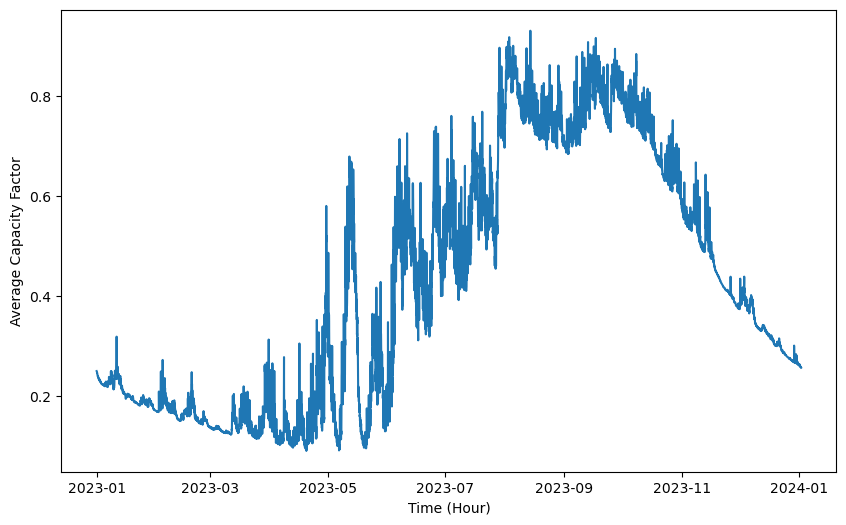

In [48]:
import matplotlib.pyplot as plt

# Calculate the average capacity factor for each hour across all plants
hourly_average = capacity_factor.mean(dim='plant')

# Plot the hourly average capacity factor over time
plt.figure(figsize=(10, 6))

# Plot the hourly average
plt.plot(hourly_average['time'], hourly_average.values)

# Add title and labels
# plt.title('Average Capacity Factor for Each Hour (All Plants)')
plt.xlabel('Time (Hour)')
plt.ylabel('Average Capacity Factor')

# Display the plot
plt.show()

# Optionally, save the plot
# plt.savefig("average_capacity_factor_per_hour.png")


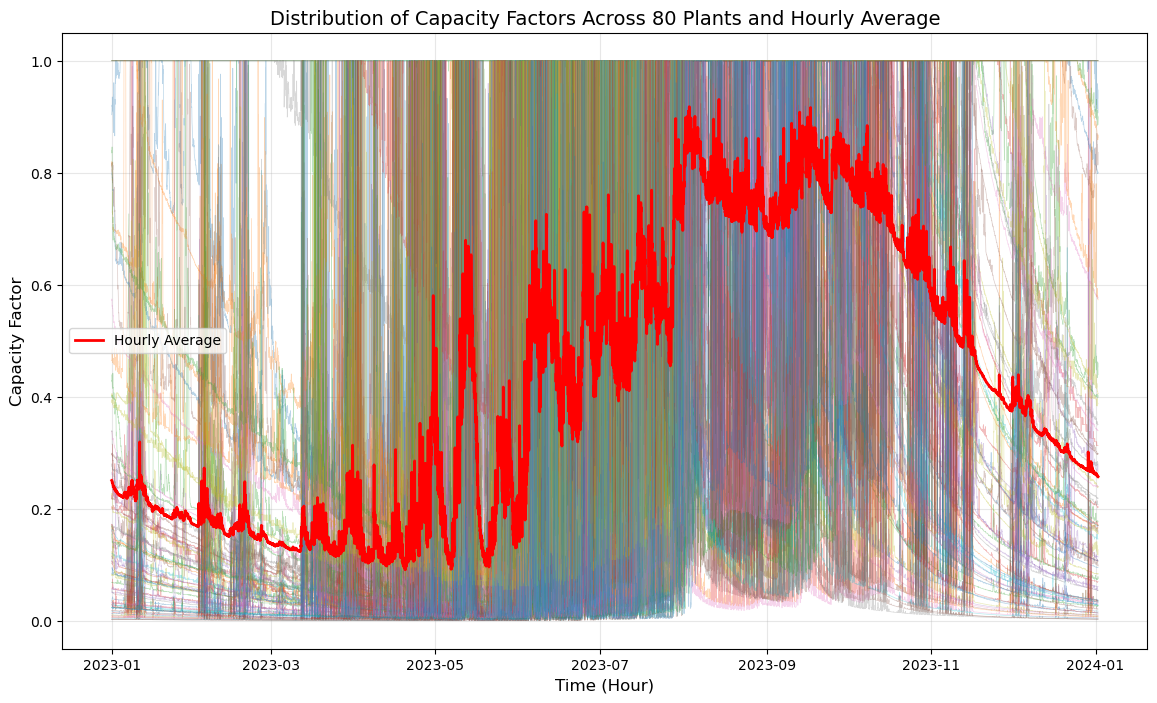

In [49]:
import matplotlib.pyplot as plt

# Calculate the average capacity factor for each hour across all plants
hourly_average = capacity_factor.mean(dim='plant')

# Set up the figure and axis
plt.figure(figsize=(14, 8))

# Plot the individual capacity factors for each plant as transparent lines
for plant in capacity_factor.plant:
    plt.plot(capacity_factor['time'], capacity_factor.sel(plant=plant), alpha=0.3, linewidth=0.5, label='_nolegend_')

# Plot the hourly average capacity factor as a bold line
plt.plot(hourly_average['time'], hourly_average.values, color='red', label='Hourly Average', linewidth=2)

# Add title, labels, and legend
plt.title('Distribution of Capacity Factors Across 80 Plants and Hourly Average', fontsize=14)
plt.xlabel('Time (Hour)', fontsize=12)
plt.ylabel('Capacity Factor', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Display the plot
plt.show()

# Optionally, save the plot to a file
# plt.savefig("capacity_factor_distribution.png", dpi=300)


In [89]:
import matplotlib.pyplot as plt

# Function to select diverse plants based on variability
def select_diverse_plants(capacity_factor, num_plants=30):
    # Calculate the standard deviation of capacity factors for each plant
    plant_variability = capacity_factor.std(dim='time')
    # Select the top plants with the highest variability
    diverse_plants = plant_variability.argsort()[-num_plants:].values
    return diverse_plants

# Select 30 diverse plants based on their variability
diverse_plants = select_diverse_plants(capacity_factor, num_plants=30)

# Calculate the average capacity factor for each hour across all plants
hourly_average = capacity_factor.mean(dim='plant')

# Set up the figure and axis
plt.figure(figsize=(14, 8))

# Plot the individual capacity factors for the selected diverse plants
for plant in diverse_plants:
    plt.plot(capacity_factor['time'], capacity_factor.sel(plant=plant), alpha=0.6, linewidth=1, label=str(plant.values))

# Plot the hourly average capacity factor as a bold line
plt.plot(hourly_average['time'], hourly_average.values, color='red', label='Hourly Average', linewidth=2)

# Add title, labels, and legend
plt.title('Distribution of Capacity Factors (Selected 30 Plants and Hourly Average)', fontsize=14)
plt.xlabel('Time (Hour)', fontsize=12)
plt.ylabel('Capacity Factor', fontsize=12)
plt.legend(title="Plants", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(alpha=0.3)

# Display the plot
plt.tight_layout()
plt.show()

# Optionally, save the plot to a file
# plt.savefig("capacity_factor_distribution_selected.png", dpi=300)


AttributeError: 'numpy.int64' object has no attribute 'values'

<Figure size 1400x800 with 0 Axes>

### Comparison to actual values in 2019 and 2022

In [ ]:
# Function to calculate hourly capacity factors for a given year
# def calculate_hourly_capacity_factors(location_hydro):
    # Initialize an empty DataFrame
    hourly_capacity_factors = pd.DataFrame()

    # Iterate over each plant
    for index, row in location_hydro.iterrows():
        plant_name = row['Name']
        plant_capacity = row['Total capacity (MW)']  # Plant capacity in MW

        # Generate an empty list to hold hourly capacity factors for the plant
        plant_hourly_factors = []

        # Spread the generation for each month evenly across the respective hours
        for month in monthly_columns:
            monthly_generation = row[month] * 1000  # Convert GWh to MWh
            hourly_generation = monthly_generation / hours_in_month[month]  # MWh per hour
            hourly_capacity_factor = hourly_generation / plant_capacity  # Capacity factor

            # Repeat this capacity factor for each hour of the month
            plant_hourly_factors.extend([hourly_capacity_factor] * hours_in_month[month])

        # Add the plant's hourly capacity factors to the DataFrame
        hourly_capacity_factors[plant_name] = plant_hourly_factors

    # Ensure proper time index for the year
    time_index = pd.date_range(start='2023-01-01', end='2023-12-31 23:00', freq='H')
    hourly_capacity_factors.index = time_index

    return hourly_capacity_factors

def calculate_hourly_capacity_factors(location_hydro):
    # Initialize an empty DataFrame to store smoothed hourly capacity factors
    smoothed_capacity_factors = pd.DataFrame()

    for index, row in location_hydro.iterrows():
        plant_name = row['Name']
        plant_capacity = row['Total capacity (MW)']

        # Generate a time series of monthly averages
        monthly_capacity_factors = []
        for month in monthly_columns:
            monthly_generation = row[month] * 1000  # Convert GWh to MWh
            monthly_capacity_factor = (monthly_generation / hours_in_month[month]) / plant_capacity
            monthly_capacity_factors.append(monthly_capacity_factor)

        # Create a time index for the first day of each month
        monthly_time_index = pd.date_range(start='2023-01-01', end='2024-01-01', freq='MS')[:-1]

        # Create a Series with monthly capacity factors
        monthly_series = pd.Series(data=monthly_capacity_factors, index=monthly_time_index)

        # Interpolate to create hourly data
        hourly_series = monthly_series.resample('h').interpolate(method='cubic')

        # Add the smoothed hourly capacity factors to the DataFrame
        smoothed_capacity_factors[plant_name] = hourly_series

    # Ensure proper time index for the year
    time_index = pd.date_range(start='2023-01-01', end='2023-12-31 23:00', freq='h')
    smoothed_capacity_factors = smoothed_capacity_factors.reindex(time_index)

    return smoothed_capacity_factors


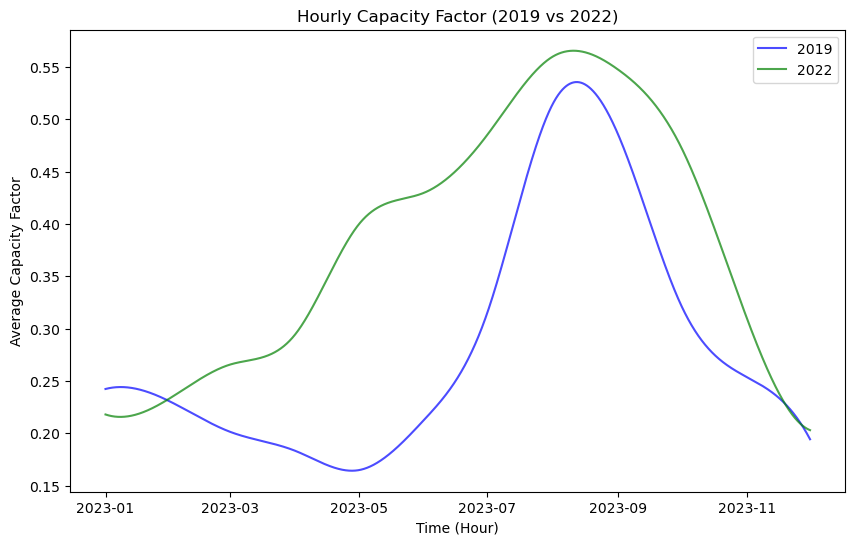

In [86]:

# Load hydropower data for 2019
location_hydro_2019 = gpd.read_file('Resources\\0Seasonality\\2019\\Data_3\\hydropower_dams.gpkg')
location_hydro_2019.rename(columns={'Latitude': 'lat', 'Longitude': 'lon'}, inplace=True)

# Load hydropower data for 2022
location_hydro_2022 = gpd.read_file('Resources\\0Seasonality\\2022\\Data_2\\hydropower_dams.gpkg')
location_hydro_2022.rename(columns={'Latitude': 'lat', 'Longitude': 'lon'}, inplace=True)

# Monthly generation columns
monthly_columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Hours in each month for the year 2023
hours_in_month = {
    'Jan': 744, 'Feb': 672, 'Mar': 744, 'Apr': 720,
    'May': 744, 'Jun': 720, 'Jul': 744, 'Aug': 744,
    'Sep': 720, 'Oct': 744, 'Nov': 720, 'Dec': 744
}


# Calculate hourly capacity factors for 2019 and 2022
hourly_capacity_factors_2019 = calculate_hourly_capacity_factors(location_hydro_2019)
hourly_capacity_factors_2022 = calculate_hourly_capacity_factors(location_hydro_2022)
# Calculate the hourly average capacity factors across all plants
hourly_average_2019 = hourly_capacity_factors_2019.mean(axis=1)
hourly_average_2022 = hourly_capacity_factors_2022.mean(axis=1)

# Plot the results using hourly data
plt.figure(figsize=(10, 6))

# Plot the 2019 hourly average
plt.plot(hourly_average_2019.index, hourly_average_2019.values, label='2019', color='blue', alpha=0.7)

# Plot the 2022 hourly average
plt.plot(hourly_average_2022.index, hourly_average_2022.values, label='2022', color='green', alpha=0.7)

# Add title and labels
plt.title('Hourly Capacity Factor (2019 vs 2022)')
plt.xlabel('Time (Hour)')
plt.ylabel('Average Capacity Factor')

# Add legend
plt.legend()

# Display the plot
plt.show()


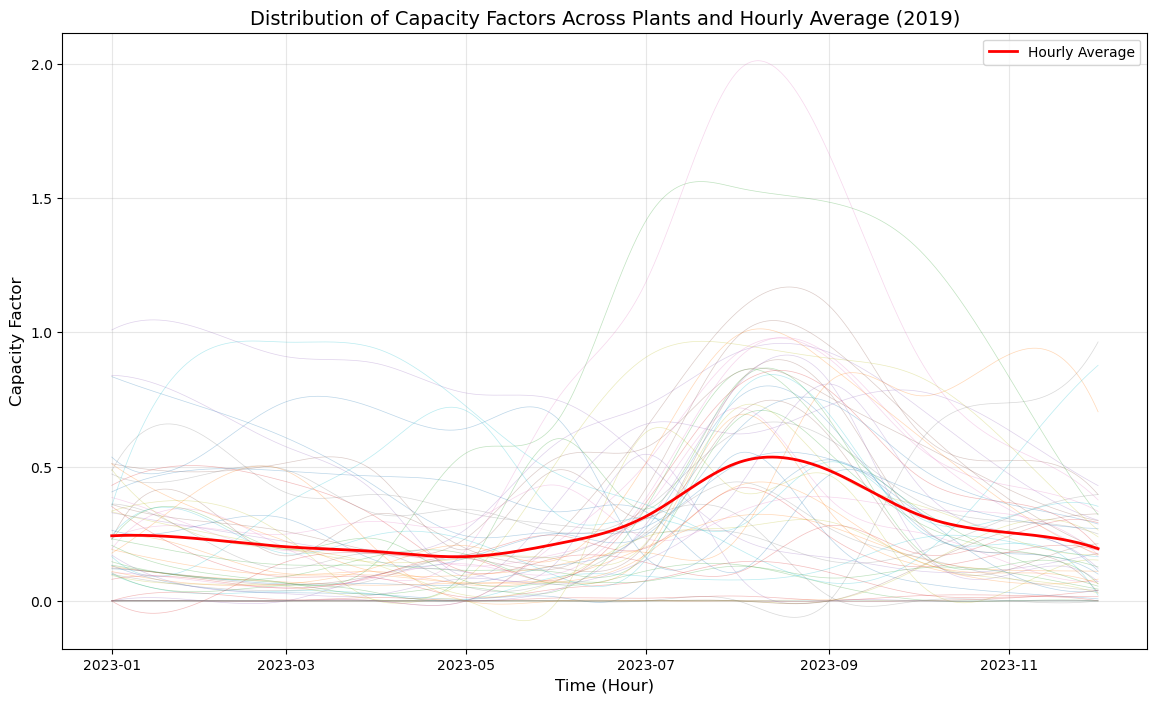

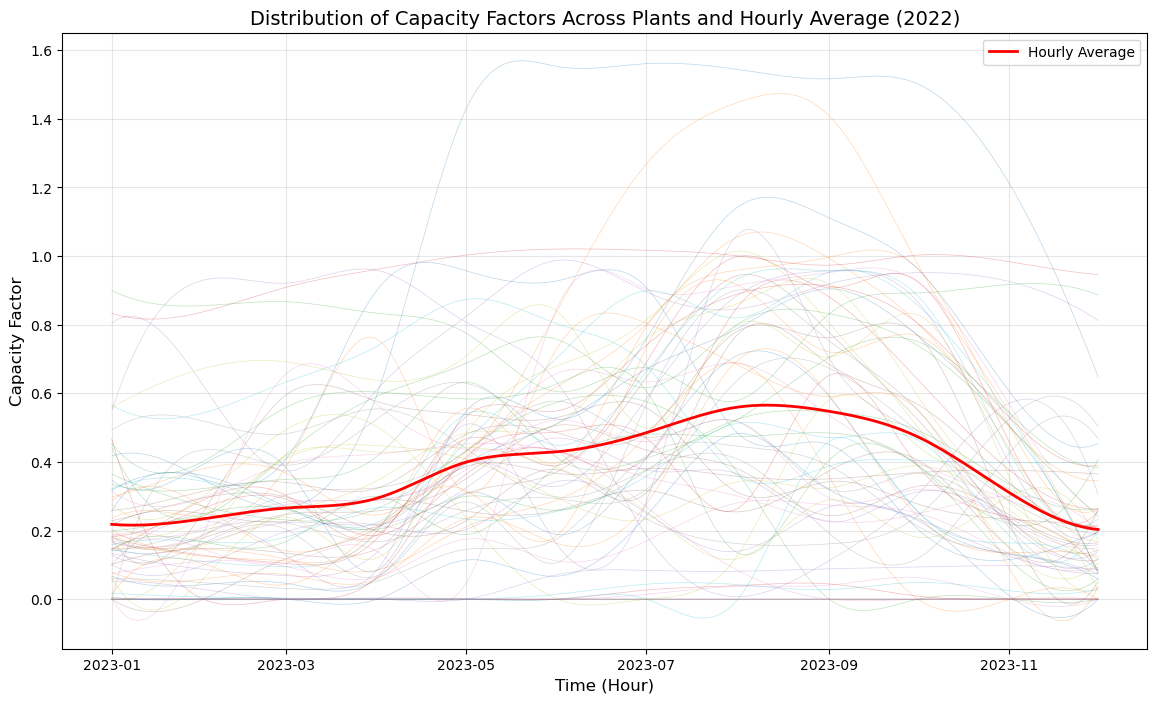

In [87]:
import matplotlib.pyplot as plt

# Function to visualize capacity factors for a single year
def plot_capacity_factors(capacity_factor, year):
    # Calculate the average capacity factor for each hour across all plants
    hourly_average = capacity_factor.mean(axis=1)

    # Set up the figure and axis
    plt.figure(figsize=(14, 8))

    # Plot the individual capacity factors for each plant as transparent lines
    for plant in capacity_factor.columns:
        plt.plot(capacity_factor.index, capacity_factor[plant], alpha=0.3, linewidth=0.5, label='_nolegend_')

    # Plot the hourly average capacity factor as a bold line
    plt.plot(hourly_average.index, hourly_average.values, color='red', label='Hourly Average', linewidth=2)

    # Add title, labels, and legend
    plt.title(f'Distribution of Capacity Factors Across Plants and Hourly Average ({year})', fontsize=14)
    plt.xlabel('Time (Hour)', fontsize=12)
    plt.ylabel('Capacity Factor', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)

    # Display the plot
    plt.show()

    # Optionally, save the plot to a file
    # plt.savefig(f"capacity_factor_distribution_{year}.png", dpi=300)

# Plot for 2019
plot_capacity_factors(hourly_capacity_factors_2019, 2019)

# Plot for 2022
plot_capacity_factors(hourly_capacity_factors_2022, 2022)


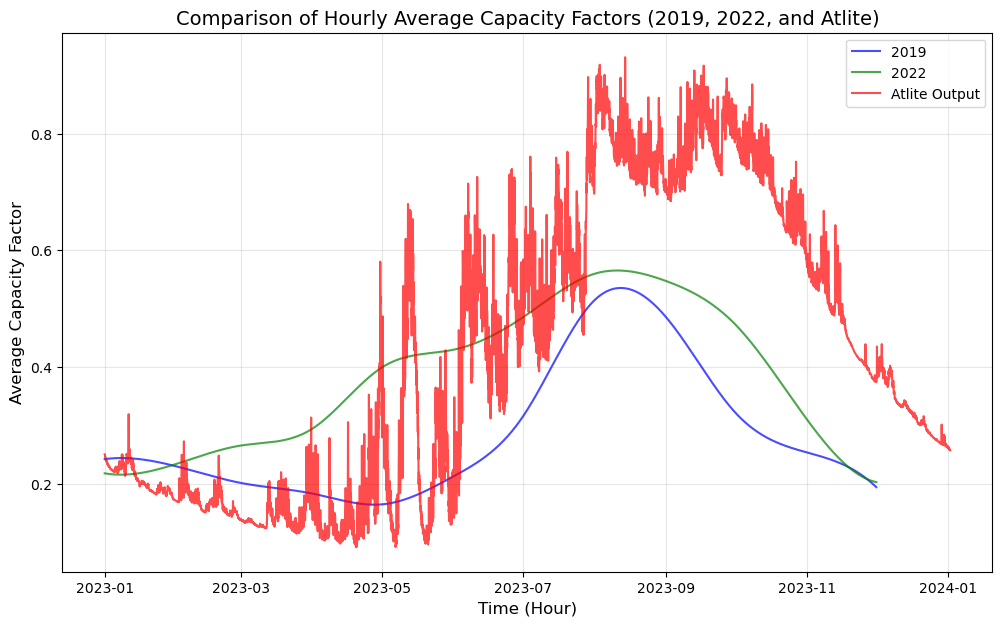

In [88]:
import matplotlib.pyplot as plt

# Calculate the average capacity factor for each hour across all plants
hourly_average_2019 = hourly_capacity_factors_2019.mean(axis=1)
hourly_average_2022 = hourly_capacity_factors_2022.mean(axis=1)
hourly_average_atlite = capacity_factor.mean(dim='plant')  # Assuming capacity_factor is from Atlite output

# Plot the hourly average capacity factor over time
plt.figure(figsize=(12, 7))

# Plot the hourly average for 2019
plt.plot(hourly_average_2019.index, hourly_average_2019.values, label='2019', color='blue', alpha=0.7)

# Plot the hourly average for 2022
plt.plot(hourly_average_2022.index, hourly_average_2022.values, label='2022', color='green', alpha=0.7)

# Plot the Atlite output
plt.plot(hourly_average_atlite['time'], hourly_average_atlite.values, label='Atlite Output', color='red', alpha=0.7)

# Add title and labels
plt.title('Comparison of Hourly Average Capacity Factors (2019, 2022, and Atlite)', fontsize=14)
plt.xlabel('Time (Hour)', fontsize=12)
plt.ylabel('Average Capacity Factor', fontsize=12)

# Add legend
plt.legend()

# Add grid for better visualization
plt.grid(alpha=0.3)

# Display the plot
plt.show()

# Optionally, save the plot
# plt.savefig("capacity_factor_comparison.png", dpi=300)
